### **Salary Predictions – Glassdoor Jobs Dataset**

This project leverages a 2017 Glassdoor job postings dataset to analyze salary trends based on job positions, company size, industry, and other factors. Through EDA, feature engineering, and machine learning models, the project aims to predict salaries and uncover key insights into the job market.

In [53]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
#checking the current working directory

os.getcwd()

'C:\\Users\\deela\\Downloads\\Data\\Python'

In [55]:
#Changing the current working directory

os.chdir('C:/Users/deela/Downloads/Data/Python')

In [56]:
#Checking the current working directory

os.getcwd()

'C:\\Users\\deela\\Downloads\\Data\\Python'

In [57]:
#loading the dataset

cwd = os.getcwd()

df = pd.read_csv(cwd + "\\glassdoor_jobs.csv", encoding="ISO-8859-1")

In [58]:
#Checking the first 5 rows of the dataset

df.head()

,Column1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [59]:
# Display the processed DataFrame

display(df)

,Column1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


In [60]:
#Checking for null values in the dataset

df.isnull().sum()

Column1              0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

## Data Cleaning and Preparation

In [61]:
#Making a copy of the dataset

df_new = df.copy()

df_new

,Column1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


In [62]:
#Checking the data types of the columns

df_new.dtypes

Column1                int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [63]:
#Checking the columns description

df_new.describe()

,Column1,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [64]:
#Checking the unique values in the columns

df_new.nunique()

Column1              956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64

In [65]:
#Checking the columns in the dataset

df_new.columns

Index(['Column1', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [66]:
#Checking the unique values in the Salary Estimate columns

df_new["Salary Estimate"].unique

<bound method Series.unique of 0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
951    $72K-$133K (Glassdoor est.)
952     $56K-$91K (Glassdoor est.)
953    $95K-$160K (Glassdoor est.)
954                             -1
955    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 956, dtype: object>

In [67]:
#Checking the value count of the unique values in the Salary Estimate columns

df_new['Salary Estimate'].value_counts()


Salary Estimate
-1                                  214
$21-$34 Per Hour(Glassdoor est.)      6
$49K-$113K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
                                   ... 
$105K-$173K (Glassdoor est.)          1
$46K-$85K (Glassdoor est.)            1
$71K-$134K (Glassdoor est.)           1
$102K-$190K (Glassdoor est.)          1
$27-$47 Per Hour(Glassdoor est.)      1
Name: count, Length: 417, dtype: int64

In [68]:
# Show rows where Salary Estimate is -1

df_new[df_new['Salary Estimate'] == '-1']


,Column1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
24,24,Data Scientist,-1,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,Oregon,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1
42,42,Data Scientist,-1,Take your career to new heights working with a...,4.1,Amount\n4.1,"Chicago, IL","Chicago, IL",201 to 500 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
47,47,Data Science Analyst,-1,Company Overview:\n\nBrightside is an employee...,5.0,Brightside\n5.0,"Chandler, AZ","San Francisco, CA",51 to 200 employees,2017,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1
53,53,Data Engineer,-1,"Data Engineer\nÂ£50,000 â Â£70,000 See Adver...",4.5,Anson McCade\n4.5,"Kingdom, IL","London, United Kingdom",51 to 200 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$1 to $5 million (USD),-1
64,64,Business Intelligence Analyst,-1,Business Intelligence Analyst\nAccounting\n50 ...,3.1,Amica Mutual\n3.1,"Lincoln, RI","Lincoln, RI",1001 to 5000 employees,1907,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,923,Data Engineer 5 - Contract,-1,Purposes\n\nThis is a contract position that w...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1
925,925,Data Scientists,-1,Position Description:\nThe Analytics Research ...,3.3,Miracle Software Systems\n3.3,Michigan,"Novi, MI",51 to 200 employees,1994,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"CSC, IBM"
927,927,"Head Data Scientist â Image Analytics lead, ...",-1,"06-Feb-2020\n\nJob ID\n279186BR\n{""QuestionNam...",3.8,Novartis\n3.8,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1
937,937,"Scientist, Product Development",-1,Requisition Number:\nVALA4948\n\nJob Title:\nS...,2.9,Pharmavite\n2.9,"Valencia, CA","West Hills, CA",1001 to 5000 employees,1971,Company - Private,Consumer Products Manufacturing,Manufacturing,$1 to $2 billion (USD),"The Nature's Bounty Co., Schiff Nutrition Inte..."


In [69]:
# Removing rows where Salary Estimate is -1

df_new = df_new[df_new['Salary Estimate'] != '-1']


In [70]:
# Check if any '-1' values remain
df_new['Salary Estimate'].value_counts()


Salary Estimate
$54K-$115K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$49K-$113K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$81K-$167K (Glassdoor est.)         5
                                   ..
$52K-$99K (Glassdoor est.)          1
$105K-$173K (Glassdoor est.)        1
$46K-$85K (Glassdoor est.)          1
$71K-$134K (Glassdoor est.)         1
$102K-$190K (Glassdoor est.)        1
Name: count, Length: 416, dtype: int64

In [71]:
df_new.head(5)

,Column1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [72]:
#dropping the column 'Column1'

df_new = df_new.drop('Column1', axis=1)


In [73]:
# Extracting the salary from the Salary Estimate column

import re

df_new = df_new.copy() 

# Remove text in parentheses (if any)
df_new['Salary Estimate'] = df_new['Salary Estimate'].apply(lambda x: x.split('(')[0])



In [74]:
#Extract numeric salary values
df_new['Min Salary'] = df_new['Salary Estimate'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if '-' in x else None)
df_new['Max Salary'] = df_new['Salary Estimate'].apply(lambda x: int(re.findall(r'\d+', x)[1]) if '-' in x else None)



In [75]:
# Compute average salary
df_new['Avg Salary'] = (df_new['Min Salary'] + df_new['Max Salary']) / 2

# Display first few rows
df_new[['Salary Estimate', 'Min Salary', 'Max Salary', 'Avg Salary']].head()


,Salary Estimate,Min Salary,Max Salary,Avg Salary
0,$53K-$91K,53,91,72.0
1,$63K-$112K,63,112,87.5
2,$80K-$90K,80,90,85.0
3,$56K-$97K,56,97,76.5
4,$86K-$143K,86,143,114.5


In [76]:
# Rename the columns to include "$" and "K" to indicate the currency and thousands
df_new = df_new.rename(columns={
    'Min Salary': 'Min Salary ($, K)',
    'Max Salary': 'Max Salary ($, K)',
    'Avg Salary': 'Avg Salary ($, K)'
})

# Display first few rows
df_new[['Salary Estimate', 'Min Salary ($, K)', 'Max Salary ($, K)', 'Avg Salary ($, K)']].head()


,Salary Estimate,"Min Salary ($, K)","Max Salary ($, K)","Avg Salary ($, K)"
0,$53K-$91K,53,91,72.0
1,$63K-$112K,63,112,87.5
2,$80K-$90K,80,90,85.0
3,$56K-$97K,56,97,76.5
4,$86K-$143K,86,143,114.5


In [77]:
#Checking unique values in the Company Size column
df_new['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [78]:
df_new[df_new['Size'] == '-1'] # Displays rows where Size is '-1'

size_minus1 = df_new[df_new['Size'] == '-1']
display(size_minus1)

# Display rows where Size is 'Unknown'
size_unknown = df_new[df_new['Size'] == 'Unknown']
display(size_unknown)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,"Min Salary ($, K)","Max Salary ($, K)","Avg Salary ($, K)"
741,"Scientist â Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist â Cancer Discovery, Molecular Assa...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1,100,135,117.5


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,"Min Salary ($, K)","Max Salary ($, K)","Avg Salary ($, K)"
48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,150,160,155.0
472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,100,140,120.0
477,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,150,160,155.0
518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,110,130,120.0
583,Data Scientist,$81K-$140K,"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,81,140,110.5
703,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,100,140,120.0
778,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,110,130,120.0
819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,120,145,132.5
943,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,100,140,120.0


In [79]:
# Creating a new cleaned version of the dataset

df_new = df_new[(df_new['Size'] != '-1') & (df_new['Size'] != 'Unknown')]


In [80]:
# Total rows before removal

total_rows = len(df)

In [81]:
# Total rows after removal
new_total_rows = len(df_new)

# Calculating the percentage of data retained
data_retained = (new_total_rows / total_rows) * 100

# Print the percentage of data retained
print(f"After removing incomplete or invalid entries ('-1' and 'Unknown'), we have {new_total_rows} rows left ({data_retained:.2f}% of the original dataset).")


After removing incomplete or invalid entries ('-1' and 'Unknown'), we have 732 rows left (76.57% of the original dataset).


In [82]:
#checking company name column's value counts

df_new['Company Name'].value_counts()

Company Name
Takeda Pharmaceuticals\n3.7            14
Reynolds American\n3.1                 14
MassMutual\n3.6                        14
Software Engineering Institute\n2.6    11
Liberty Mutual Insurance\n3.3          10
                                       ..
Grand Rounds\n4.2                       1
SPINS, LLC\n3.5                         1
DatamanUSA, LLC\n3.4                    1
23andMe\n4.0                            1
Fivestars\n3.9                          1
Name: count, Length: 339, dtype: int64

In [83]:
#Checking the unique values in the Company Name column

df_new['Company Name'].unique

<bound method Series.unique of 0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
950                                      GSK\n3.9
951                               Eventbrite\n4.4
952           Software Engineering Institute\n2.6
953                             Numeric, LLC\n3.2
955             Riverside Research Institute\n3.6
Name: Company Name, Length: 732, dtype: object>

In [84]:
# Clean the 'Company Name' column by removing the rating
df_new['Company Name'] = df_new['Company Name'].apply(lambda x: x.split('\n')[0])

# Find the top 10 highest paying companies based on average salary
top_companies = df_new.groupby("Company Name")["Avg Salary ($, K)"].mean().sort_values(ascending=False).head(10)

# Display the result
display(top_companies)


Company Name
Gallup                      237.5
Sage Intacct                232.5
CA-One Tech Cloud           225.0
Grand Rounds                221.5
Credit Sesame               205.0
The Climate Corporation     194.0
Grainger                    179.5
Samsung Research America    177.0
Nektar Therapeutics         174.0
DTCC                        173.0
Name: Avg Salary ($, K), dtype: float64

## **Exploratory Data Analysis (EDA)**

Research Questions for Salary Insights

1. Factors Influencing Salary
✅ Which factors have the most impact on salary? 

2. Location-Based Salary Differences
✅ What are the highest-paying locations for data science roles? 

3. Industry & Type of Ownership Analysis
✅ Which industries and company ownership types offer the highest salaries for data roles? 

4. Experience & Growth Trends
✅ How does years of experience affect salary? 

5. Additional Insights
✅ Are there any outliers in salaries? (e.g., unusually high or low salaries) ✅ What are the top 10 highest-paying companies for data roles?



In [85]:
# Which factors have the most impact on salary?

# Select only numeric columns for correlation analysis
df_numeric = df_new.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Sort correlations with salary
correlation_salary = correlation_matrix['Avg Salary ($, K)'].sort_values(ascending=False)

# Display top correlations
print(correlation_salary)


Avg Salary ($, K)    1.000000
Max Salary ($, K)    0.992012
Min Salary ($, K)    0.982189
Rating               0.048903
Founded              0.021432
Name: Avg Salary ($, K), dtype: float64


In [86]:
df_new['Avg Salary ($, K)'].describe()

count    732.000000
mean     100.265027
std       38.958168
min       13.500000
25%       73.000000
50%       96.500000
75%      122.500000
max      254.000000
Name: Avg Salary ($, K), dtype: float64

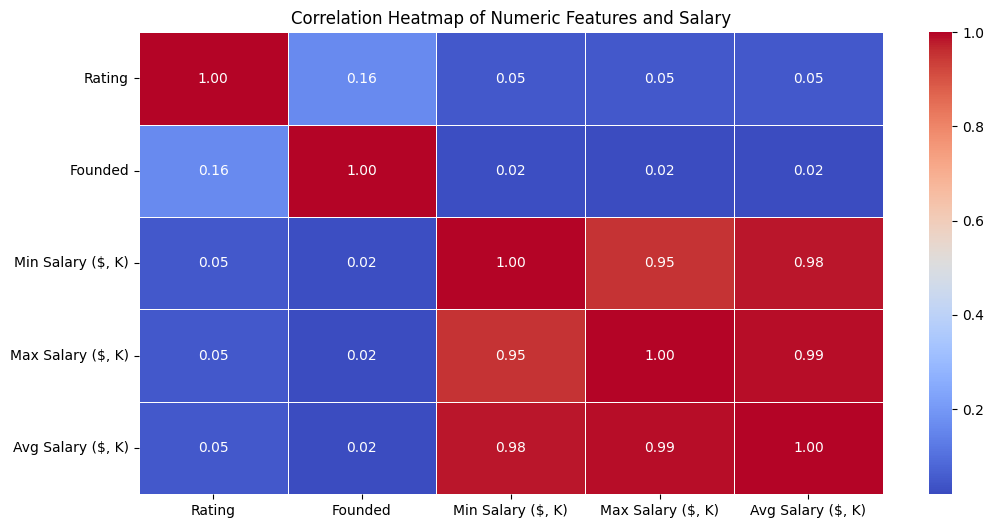

In [87]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features and Salary")
plt.show()


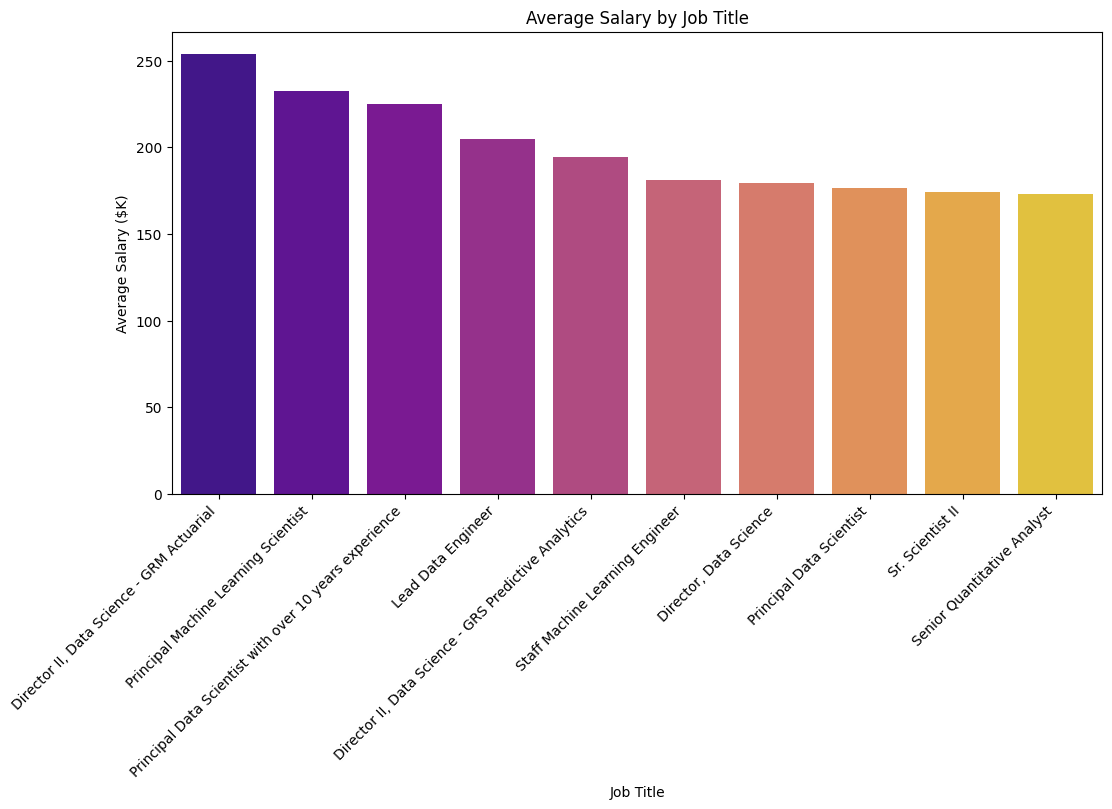

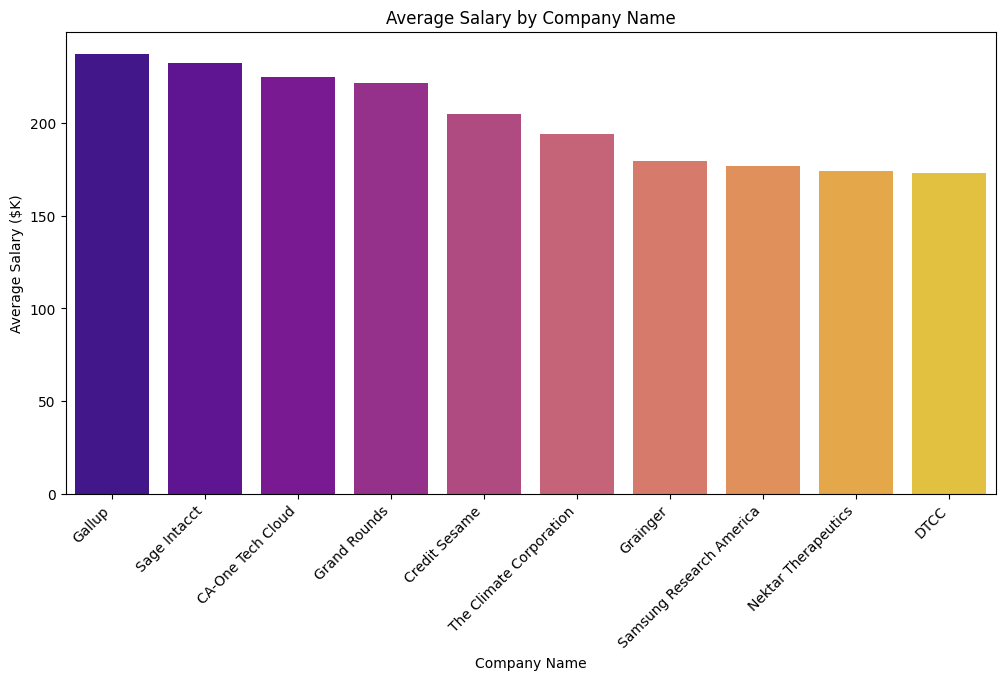

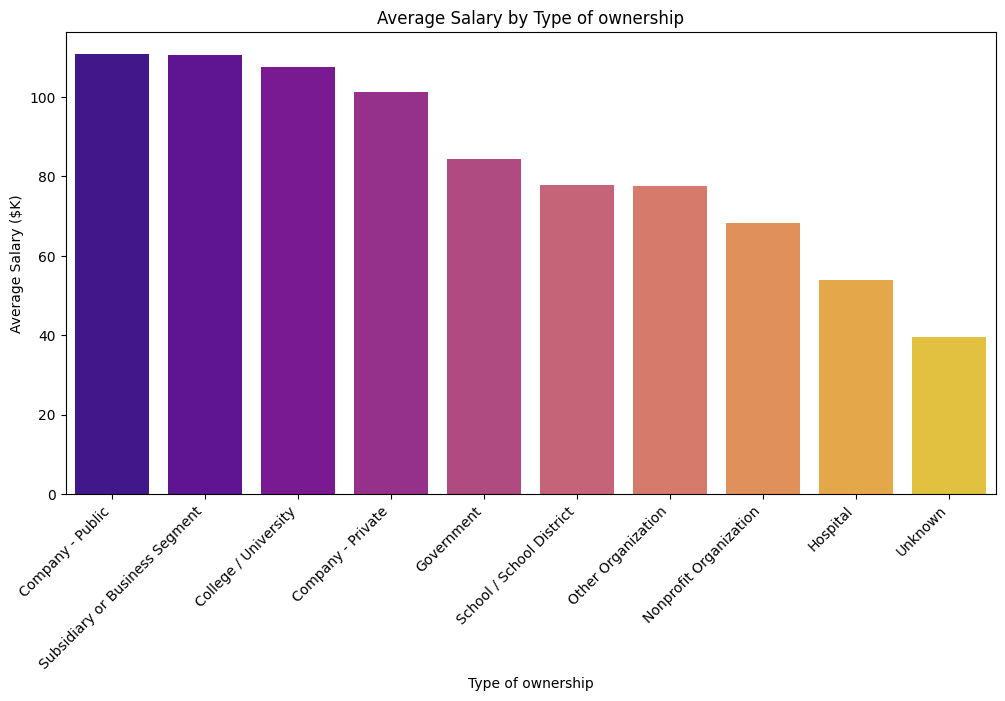

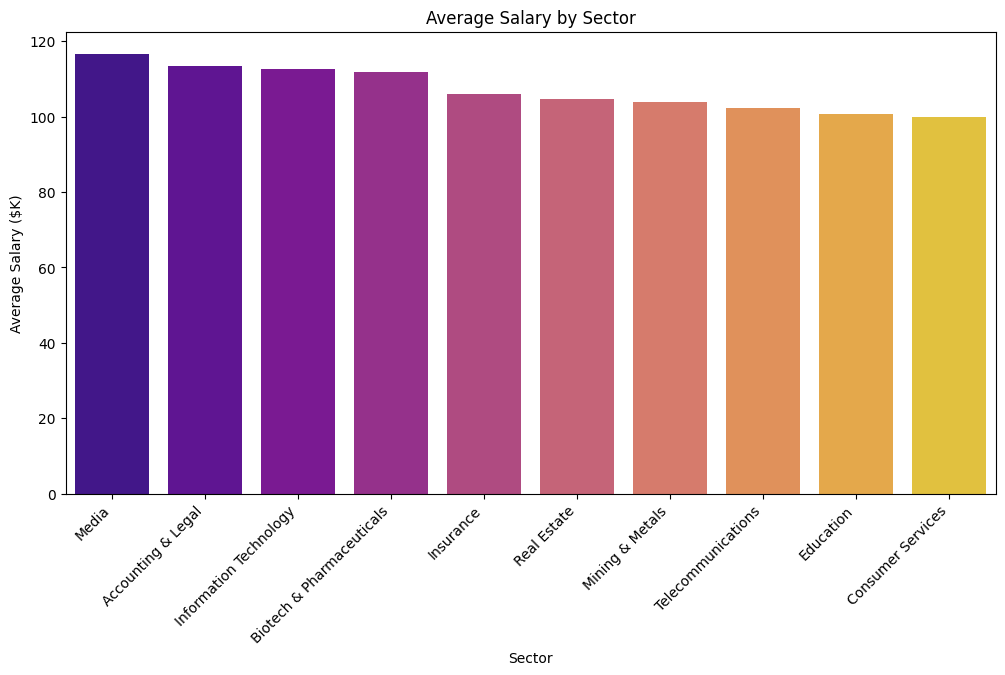

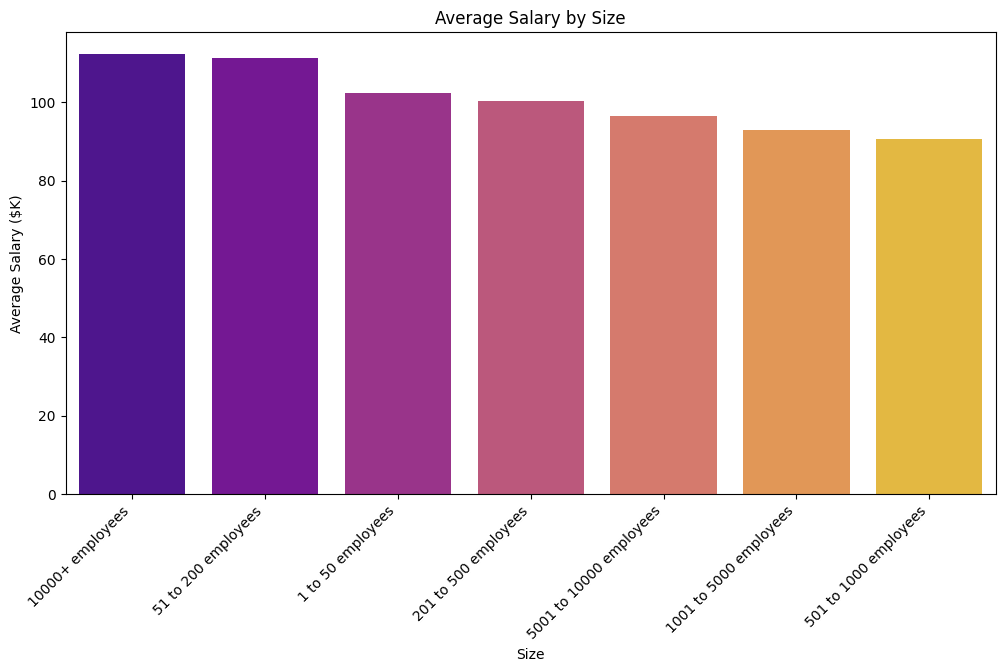

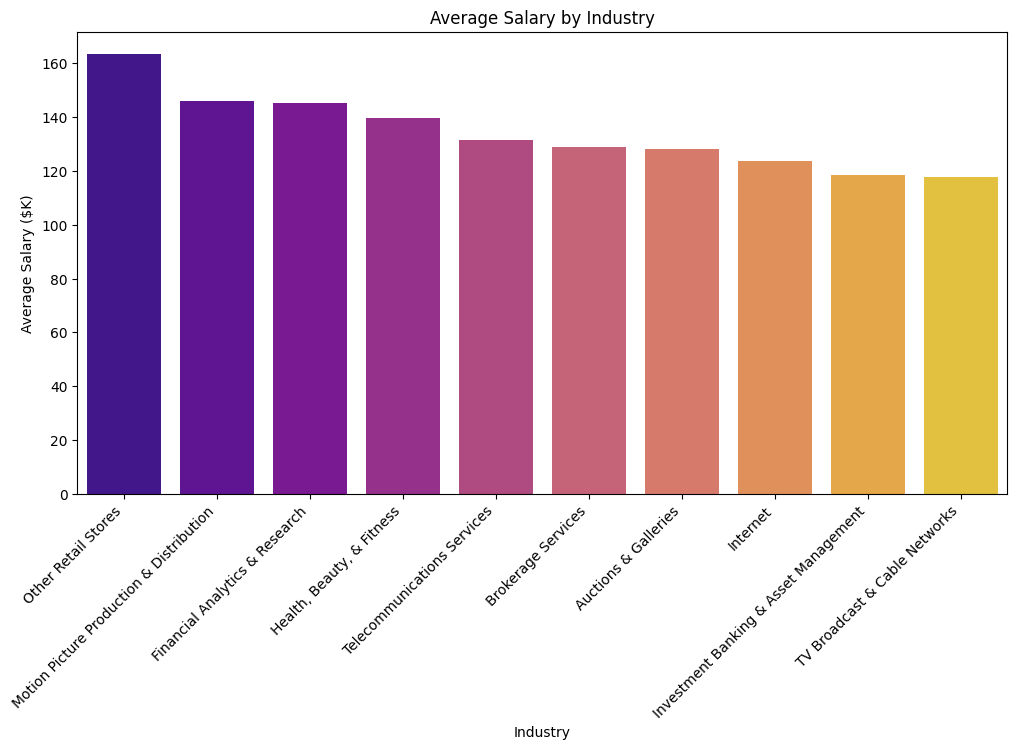

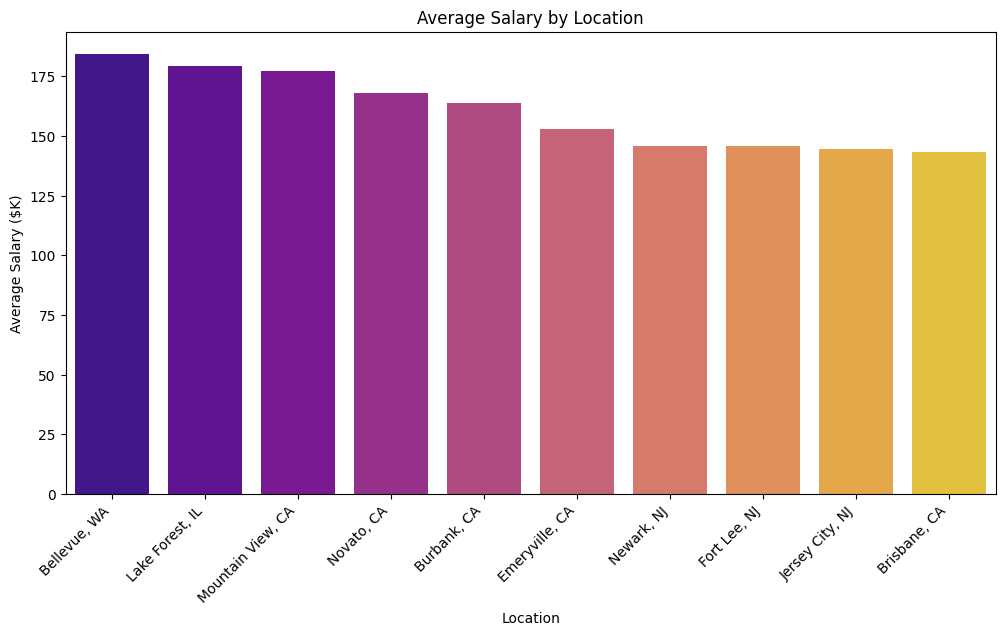

In [88]:
#creating a list of categorical features
cat_features = ['Job Title', 'Company Name', 'Type of ownership', 'Sector', 'Size', 'Industry', 'Location']

# Plot average salary by each categorical feature
for col in cat_features:
    salary_impact = df_new.groupby(col)['Avg Salary ($, K)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=salary_impact.index[:10], y=salary_impact.values[:10], hue=salary_impact.index[:10], palette="plasma")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Average Salary by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Salary ($K)")
    plt.show()


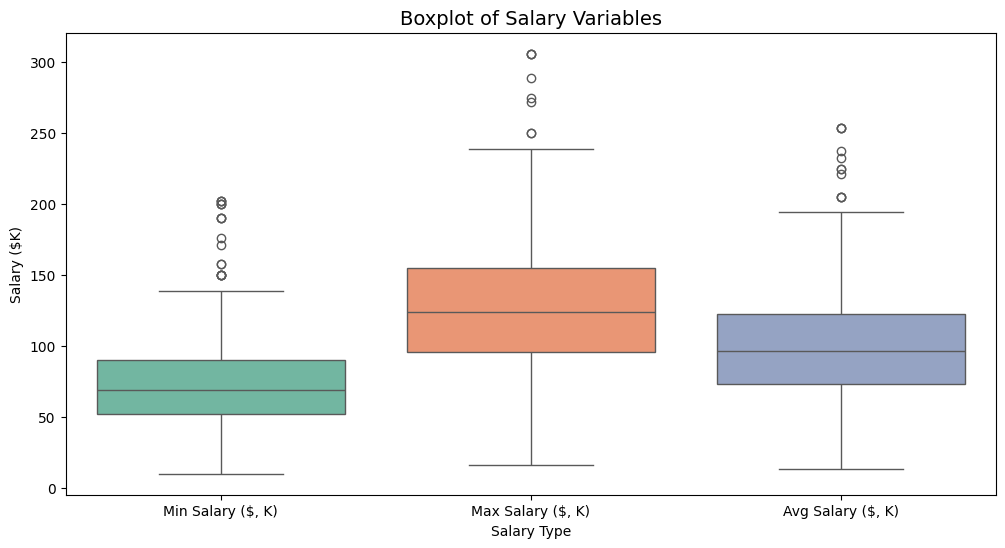

In [89]:
# Creating a figure with subplots
plt.figure(figsize=(12, 6))

# Plot boxplots for min, max, and avg salaries
sns.boxplot(data=df_new[['Min Salary ($, K)', 'Max Salary ($, K)', 'Avg Salary ($, K)']], palette="Set2")

# Set title and labels
plt.title("Boxplot of Salary Variables", fontsize=14)
plt.ylabel("Salary ($K)")
plt.xlabel("Salary Type")

# Show the plot
plt.show()


### *Summary of Exploratory Data Analysis (EDA)*

This analysis explores salary trends in data science roles, focusing on factors influencing salaries, geographic variations, industry insights, and company-level differences.

1. **Factors Influencing Salary**

    - The correlation heatmap plotted showed that `Min Salary`, `Max Salary`, and `Avg Salary` are highly interrelated.
    Other numerical features, such as Company Rating and Founded Year, had weak correlations with salary, indicating minimal direct influence.

2. **Location-Based Salary Differences**

    - Cities like Bellevue, WA, and Lake Forest, IL emerged as the highest-paying locations for data science roles.

3. **Industry & Type of Ownership Analysis**:
        
    - The highest-paying industries include Biotech & Pharmaceuticals, Information Technology, and Financial Analytics, showing that highly technical and finance-related fields offer competitive salaries.
        
    - The type of company ownership also plays a role in salary differences. Public companies, subsidiaries, and private firms tend to pay higher salaries than nonprofit organizations and hospitals.

4. **Experience & Growth Trends**:
    - The average salary by job title revealed that senior-level roles such as Data Science Manager and Principal Data Scientist command significantly higher salaries compared to entry-level roles, indicating a clear growth trend with experience. This confirms the trend that experience strongly impacts salary.

5. **Additional Insights**:
    - The boxplot analysis revealed outliers, particularly in `Max Salary`, indicating unusually high salaries in some cases. 

    - The top 10 highest-paying companies were identified, with Gallup, Sage Intacct, and CA-One Tech Cloud leading the list, providing insights into the best-paying organizations for data roles.

    - Larger companies (10,000+ employees) generally offer higher salaries, but interestingly, some smaller companies (51-200 employees) also provide competitive pay, possibly due to specialized roles or high-value industries.

## **Feature Engineering**

In [90]:
# Drop irrelevant columns
df_new.drop(columns=['Headquarters', 'Competitors', 'Job Description', 'Salary Estimate'], inplace=True)

# Display remaining columns
print(df_new.columns)


Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Min Salary ($, K)', 'Max Salary ($, K)', 'Avg Salary ($, K)'],
      dtype='object')


In [91]:
#df_encoded = pd.get_dummies(df_new, columns=['Job Title', 'Location', 'Industry', 'Revenue', 'Size','Type of ownership','Sector'], drop_first=True)


In [92]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to store encoded data
df_encoded = df_new.copy()

# List all categorical columns
categorical_cols = ['Job Title', 'Location', 'Industry', 'Revenue', 'Size', 'Type of ownership', 'Sector', 'Company Name']

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check the first few rows
df_encoded.head()


,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,"Min Salary ($, K)","Max Salary ($, K)","Avg Salary ($, K)"
0,69,3.8,290,3,5,1973,1,3,2,9,53,91,72.0
1,106,3.4,316,99,1,1984,6,28,12,5,63,112,87.5
2,69,4.8,162,42,5,2010,1,46,6,4,80,90,85.0
3,69,3.8,213,154,2,1965,3,18,19,10,56,97,76.5
4,69,2.9,12,122,6,1998,1,2,6,12,86,143,114.5


In [93]:
# Defining feature variables (X) and target variable (y)

# Dropping 'Min Salary', 'Max Salary', and 'Avg Salary' from X to prevent data leakage
X = df_encoded.drop(columns=['Min Salary ($, K)', 'Max Salary ($, K)','Avg Salary ($, K)'])

# Setting 'Avg Salary' as the target variable (y) for salary prediction
y = df_encoded['Avg Salary ($, K)']

In [94]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform X (features)
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check scaled data
X_scaled.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,-0.713994,0.210123,1.198183,-1.728616,1.014630,0.245505,-0.565088,-1.340860,-1.777378,0.564347
1,-0.192956,-0.415122,1.474274,-0.055292,-1.200759,0.269892,2.199913,0.410085,0.228853,-0.400845
2,-0.713994,1.773235,-0.161039,-1.048828,1.014630,0.327536,-0.565088,1.670765,-0.974886,-0.642143
3,-0.713994,0.210123,0.380526,0.903384,-0.646912,0.227768,0.540913,-0.290293,1.633214,0.805645
4,-0.713994,-1.196678,-1.753877,0.345609,1.568478,0.300931,-0.565088,-1.410898,-0.974886,1.288241


In [95]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shape of training and testing sets
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (585, 10), Testing Set: (147, 10)


### **Model Performance**

In [96]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 30.49
Mean Squared Error: 1784.87
R² Score: -0.01


In [97]:
print(X.columns)

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue'],
      dtype='object')


In [98]:
X_test

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
604,-0.023970,1.616924,1.038899,1.060258,1.568478,0.318668,-0.565088,1.880878,-0.974886,-1.366037
33,-0.713994,0.210123,-0.192896,1.391437,0.460783,0.296497,-0.012087,2.161029,2.235084,-0.400845
300,-1.375854,1.147990,1.007042,-0.299318,-1.754607,0.338622,-0.565088,-0.220255,0.429476,1.288241
457,-0.530927,0.210123,-1.286644,0.345609,-1.200759,0.232202,-0.012087,-0.220255,0.429476,-0.883441
634,1.158928,-0.258810,1.601701,0.223596,-1.200759,0.238853,-0.012087,-0.780558,0.429476,-0.883441
...,...,...,...,...,...,...,...,...,...,...
70,-0.333777,-0.102499,-0.437131,-0.142444,-1.200759,0.143519,-0.012087,2.581256,-0.974886,-0.883441
192,1.820788,0.366434,1.166326,1.060258,-0.093065,0.320885,-0.565088,0.830311,0.429476,-1.124739
328,-0.150710,0.053812,0.125672,-1.083689,-1.200759,0.145736,-0.012087,-0.780558,0.429476,0.081751
165,0.708300,-1.509300,1.017661,0.066722,1.568478,0.196729,0.540913,0.900349,-0.172393,0.564347


In [99]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

print(X_train.head())
print(X_test.head())


(585, 10) (147, 10)
(585,) (147,)
     Job Title    Rating  Company Name  Location      Size   Founded  \
683  -0.094381 -0.727744     -0.033612  0.153874  0.460783  0.212248   
250  -0.713994  0.053812     -0.458369  0.816232 -0.646912  0.314234   
336   0.215426  0.522746      1.230039 -1.275424 -0.646912  0.254373   
260   0.370329  0.053812      1.155707 -1.327716 -1.200759 -0.180174   
439   1.778541  0.210123      1.081374 -1.484590  1.014630  0.327536   

     Type of ownership  Industry    Sector   Revenue  
683           1.646913 -0.080180  0.028230 -1.607335  
250          -0.012087  0.760273  0.630099  0.081751  
336           1.093913  0.410085  0.228853  0.564347  
260          -0.012087 -0.990671 -1.175509 -0.883441  
439          -0.565088 -0.780558  0.429476  1.288241  
     Job Title    Rating  Company Name  Location      Size   Founded  \
604  -0.023970  1.616924      1.038899  1.060258  1.568478  0.318668   
33   -0.713994  0.210123     -0.192896  1.391437  0.460783 

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")


Random Forest - Mean Absolute Error: 14.94
Random Forest - Mean Squared Error: 443.10
Random Forest - R² Score: 0.75


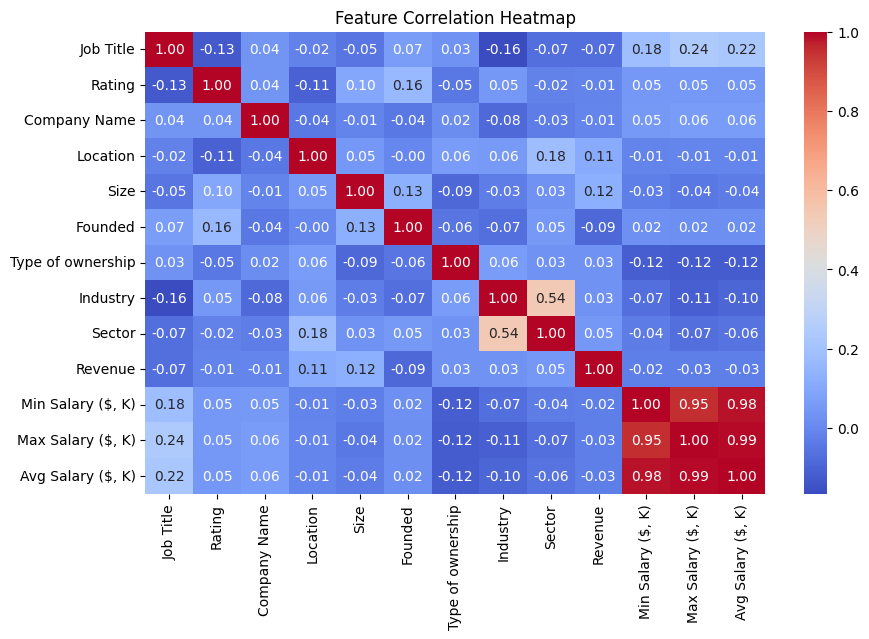

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [102]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost - Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost - R² Score: {r2_xgb:.2f}")


XGBoost - Mean Absolute Error: 9.01
XGBoost - Mean Squared Error: 333.55
XGBoost - R² Score: 0.81


In [103]:
# Get feature importance from XGBoost
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print(feature_importance.head(10))


Type of ownership    0.338743
Sector               0.226881
Size                 0.094789
Industry             0.077672
Founded              0.051827
Location             0.050178
Company Name         0.048224
Revenue              0.041985
Job Title            0.041851
Rating               0.027850
dtype: float32


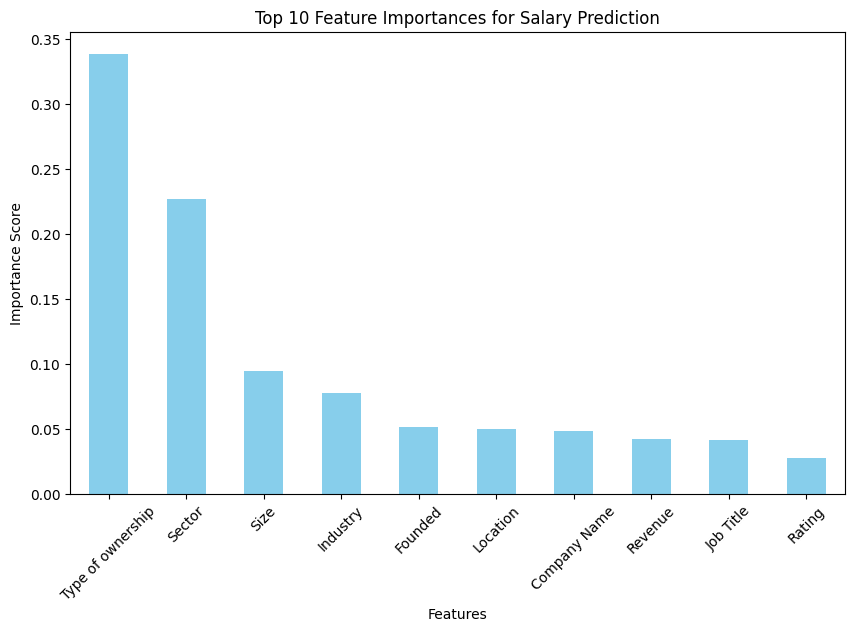

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances for Salary Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


## **Feature Engineering Summary**

Feature engineering was a crucial step in preparing the dataset for salary prediction. The following transformations and modifications were applied to improve model performance and ensure data quality.

1. Dropping Irrelevant and Redundant Columns
    - To improve model efficiency and prevent unnecessary complexity, I removed Non-informative features (Headquarters, Competitors, Job Description) and redundant salary estimates to prevent duplication.

2. Handling Categorical Variables (Encoding)
    - Applied label encoding to categorical features (Job Title, Location, Industry, Size, etc.) for compatibility with machine learning models.

3. Feature Scaling
    - To ensure that all numerical features had a comparable scale: 
    `StandardScaler` was applied, transforming the feature values to have a mean of 0 and a standard deviation of 1.
    This scaling technique is particularly beneficial for models that are sensitive to feature magnitudes, such as linear regression and gradient-boosted trees.

4. Defining Features (X) and Target Variable (y)
    - To avoid data leakage, salary-related variables were handled as follows:

    - Feature Variables (X): All independent variables were selected excluding `Min Salary`, `Max Salary`, and `Avg Salary`. Since Min and Max Salary are highly correlated with Avg Salary, removing them prevents the model from indirectly "seeing" the target value.

    - Target Variable (y): `Avg Salary` ($, K) was set as the target variable for salary prediction.

5. Splitting the Data into Training and Testing Sets
    - The dataset was split into:

    - 80% Training Data – Used for model training.
    - 20% Testing Data – Used to evaluate the model’s performance on unseen data.
    
    This ensures that the model is assessed on its ability to generalize beyond the training data.

### **Model Performance Summary**

Three regression models were trained and evaluated for salary prediction:

- **Linear Regression**:
    - Mean Absolute Error (MAE): 30.49
    - Mean Squared Error (MSE): 1784.87
    - R² Score: -0.01

- **Random Forest Regressor**:
    - Mean Absolute Error (MAE): 14.94
    - Mean Squared Error (MSE): 443.10
    - R² Score: 0.75

- **XGBoost Regressor**:
    - Mean Absolute Error (MAE): 9.01
    - Mean Squared Error (MSE): 333.55
    - R² Score: 0.81


`Linear Regression` performed poorly (R² = -0.01) due to the presence of outliers and non-linear salary trends. This suggests that salary prediction is not purely linear and that extreme salary values significantly distort predictions.

**Tree-based models** like `Random Forest` and `XGBoost` handled the outliers and non-linear relationships better, achieving much higher accuracy.

`XGBoost Regressor` was the best-performing model with an (R² Score of 0.81), demonstrating its ability to capture salary variations effectively.

### **Feature Importance Analysis**

To understand which factors most influenced salary predictions, XGBoost's feature importance ranking was analyzed.
The top 10 most significant features were:

1.  Type of Ownership
2.  Sector
3.  Company Size
4.  Industry
5.  Company Founded Year
6.  Location
7.  Company Name
8.  Revenue
9.  Job Title
10. Company Rating

The findings indicate that ownership type and industry sector play the most influential roles in determining salary, while company revenue, job title, and rating have relatively lower impacts.